# Loading the dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pokemon = pd.read_csv("pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"}) # Replacing '#' to prevent accidental comments
pokemon.head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


# Cleaning up the dataset

In [3]:
pokemon.isnull().sum() # Checking for NaN values

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
pokemon.columns = pokemon.columns.str.upper()
pokemon.head()

,NUMBER,NAME,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
print(f"Dimensions of pokemon: {pokemon.shape}")

Dimensions of pokemon: (800, 12)


In [6]:
pokemon = pokemon.set_index('NAME') # Accessing the dataframe indices via Pokemon name
pokemon.head()

,NUMBER,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,4,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,5,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
pokemon = pokemon.drop(['NUMBER'], axis=1) # Removing the 'NUMBER' column from the frame
pokemon.head()

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
print("Dataset columns:", pokemon.columns)

Dataset columns: Index(['TYPE 1', 'TYPE 2', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF',
       'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')


In [9]:
pokemon['TOTAL'] = pokemon['HP'] + pokemon['ATTACK'] + pokemon['DEFENSE'] + pokemon['SP. ATK'] + pokemon['SP. DEF'] + pokemon['SPEED']
pokemon.head()

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


# General queries

#### Bulbasaur query

In [10]:
print(pokemon.loc['Bulbasaur']) # Accessing data via the name index

TYPE 1         Grass
TYPE 2        Poison
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
TOTAL            318
Name: Bulbasaur, dtype: object


#### Which are the legendary pokemon?

In [11]:
pokemon[pokemon['LEGENDARY']==True].head(10)

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Articuno,Ice,Flying,90,85,100,95,125,85,1,True,580
Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,580
Moltres,Fire,Flying,90,100,90,125,85,90,1,True,580
Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,680
Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
Raikou,Electric,NaN,90,85,75,115,100,115,2,True,580
Entei,Fire,NaN,115,115,85,90,75,100,2,True,580
Suicune,Water,NaN,100,75,115,90,115,85,2,True,580


#### Which are the fire/dragon type pokemon?

In [12]:
pokemon[(pokemon['TYPE 1']=='Fire') | (pokemon['TYPE 1']=='Dragon')]

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
...,...,...,...,...,...,...,...,...,...,...,...
Goomy,Dragon,NaN,45,50,35,55,75,40,6,False,300
Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False,452
Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,600


#### Which are the ice and dragon type pokemon?

In [13]:
pokemon[((pokemon['TYPE 1']=='Dragon') & (pokemon['TYPE 2']=='Ice'))]

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True,660
Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700


#### Which are the best and worst pokemon by individual stats?

In [14]:
print(f"Pokemon with the highest HP: {pokemon['HP'].idxmax()} - {pokemon['HP'].max()}")
print(f"Pokemon with the highest defense: {pokemon['DEFENSE'].idxmax()} - {pokemon['DEFENSE'].max()}")
print(f"Pokemon with the highest attack: {pokemon['ATTACK'].idxmax()} - {pokemon['ATTACK'].max()}")

Pokemon with the highest HP: Blissey - 255
Pokemon with the highest defense: Mega Steelix - 230
Pokemon with the highest attack: Mega Mewtwo X - 190


In [15]:
print(f"Pokemon with the lowest HP: {pokemon['HP'].idxmin()} - {pokemon['HP'].min()}")
print(f"Pokemon with the lowest defense: {pokemon['DEFENSE'].idxmin()} - {pokemon['DEFENSE'].min()}")
print(f"Pokemon with the lowest attack: {pokemon['ATTACK'].idxmin()} - {pokemon['ATTACK'].min()}")

Pokemon with the lowest HP: Shedinja - 1
Pokemon with the lowest defense: Chansey - 5
Pokemon with the lowest attack: Chansey - 5


#### How many unique pokemon types exist?

In [16]:
print(f"The {pokemon['TYPE 1'].nunique()} different pokemon types are {pokemon['TYPE 1'].unique()}")

The 18 different pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [17]:
pokemon.groupby(['TYPE 1']).size() # Number of pokemon per primary type

TYPE 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [18]:
pokemon.groupby(['TYPE 2']).size() # Number of pokemon per secondary type

TYPE 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
dtype: int64

#### Which are the strongest pokemon by type?

In [19]:
strong_poke = pokemon.sort_values(by='TOTAL', ascending=False) # Sorting by values in TOTAL column in descending order
strong_poke.drop_duplicates(subset=['TYPE 1'], keep='first') # Storing only the first occurrence of each value from TYPE 1 column

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
Primal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720
Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700
Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,700
Giratina Origin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True,680
Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,680


#### Which are the strongest non-mega, non-legendary pokemon by type?

In [20]:
strong_poke = pokemon.sort_values(by='TOTAL', ascending=False)
# Ignoring mega and legendary pokemon
strong_poke_filtered = strong_poke[(strong_poke['LEGENDARY'] == False) & (strong_poke.index.str.startswith('Mega') == False)]
strong_poke_filtered.drop_duplicates(subset=['TYPE 1'], keep='first')

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Slaking,Normal,NaN,150,160,100,95,65,100,3,False,670
Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,600
Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,600
Mew,Psychic,NaN,100,100,100,100,100,100,1,False,600
Metagross,Steel,Psychic,80,135,130,95,90,70,3,False,600
Genesect,Bug,Steel,71,120,95,120,95,99,5,False,600
Manaphy,Water,NaN,100,100,100,100,100,100,4,False,600
Hydreigon,Dark,Dragon,92,105,90,125,90,98,5,False,600
Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555


#### Which are the weakest pokemon by type?

In [21]:
strong_poke = pokemon.sort_values(by='TOTAL', ascending=True) # Sorting in reverse order
strong_poke.drop_duplicates(subset=['TYPE 1'], keep='first')

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Sunkern,Grass,NaN,30,30,30,30,30,30,2,False,180
Azurill,Normal,Fairy,50,20,40,20,40,20,3,False,190
Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,194
Ralts,Psychic,Fairy,28,25,25,45,35,40,3,False,198
Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200
Pichu,Electric,NaN,20,40,15,35,35,60,2,False,205
Tyrogue,Fighting,NaN,35,35,35,35,35,35,2,False,210
Cleffa,Fairy,NaN,50,25,28,45,55,15,2,False,218
Poochyena,Dark,NaN,35,55,35,30,30,35,3,False,220


#### Which are the starter pokemon?

In [70]:
# Keeping the first occurrence of each type in each generation
starters = pokemon.drop_duplicates(subset=['GENERATION', 'TYPE 1'], keep='first')
# Filtering out starters - these are the first grass, water, and fire type pokemon in each generation
starters = starters[((starters['TYPE 1']=='Grass') | (starters['TYPE 1']=='Fire')) | (starters['TYPE 1']=='Water')]
starters

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
Chikorita,Grass,NaN,45,49,65,49,65,45,2,False,318
Cyndaquil,Fire,NaN,39,52,43,60,50,65,2,False,309
Totodile,Water,NaN,50,65,64,44,48,43,2,False,314
Treecko,Grass,NaN,40,45,35,65,55,70,3,False,310
Torchic,Fire,NaN,45,60,40,70,50,45,3,False,310
Mudkip,Water,NaN,50,70,50,50,50,40,3,False,310


#### Which is the strongest and weakest starter pokemon?

In [61]:
strong_starter = starters.sort_values(by='TOTAL', ascending=False) 
strong_starter

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
Chikorita,Grass,NaN,45,49,65,49,65,45,2,False,318
Turtwig,Grass,NaN,55,68,64,45,55,31,4,False,318
Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
Totodile,Water,NaN,50,65,64,44,48,43,2,False,314
Piplup,Water,NaN,53,51,53,61,56,40,4,False,314
Froakie,Water,NaN,41,56,40,62,44,71,6,False,314
Chespin,Grass,NaN,56,61,65,48,45,38,6,False,313
Treecko,Grass,NaN,40,45,35,65,55,70,3,False,310


In [62]:
strong_starter = starters.sort_values(by='TOTAL', ascending=True) 
strong_starter

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Fennekin,Fire,NaN,40,45,40,62,60,60,6,False,307
Oshawott,Water,NaN,55,55,45,63,45,45,5,False,308
Tepig,Fire,NaN,65,63,45,45,45,45,5,False,308
Snivy,Grass,NaN,45,45,55,45,55,63,5,False,308
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
Cyndaquil,Fire,NaN,39,52,43,60,50,65,2,False,309
Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309
Mudkip,Water,NaN,50,70,50,50,50,40,3,False,310
Treecko,Grass,NaN,40,45,35,65,55,70,3,False,310


#### Data statistics

In [23]:
pokemon_stats = pokemon.describe()
pokemon_stats

,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,TOTAL
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000


# Visualising the data

#### Representing statistic distributions

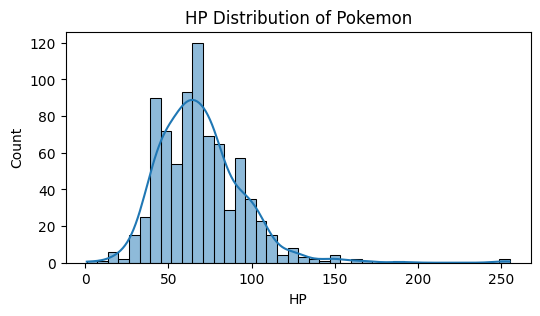

In [24]:
plt.figure(figsize=(6, 3))
plt.title("HP Distribution of Pokemon")
sns.histplot(x='HP', data=pokemon, kde=True)
plt.show()

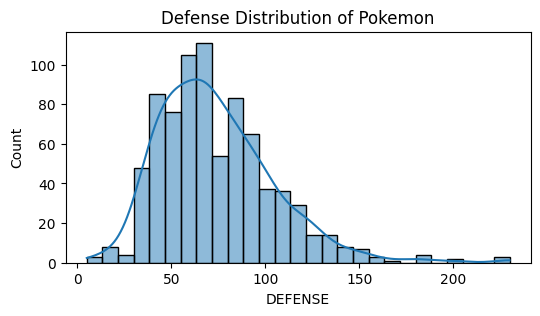

In [25]:
plt.figure(figsize=(6, 3))
plt.title("Defense Distribution of Pokemon")
sns.histplot(x='DEFENSE', data=pokemon, kde=True)
plt.show()

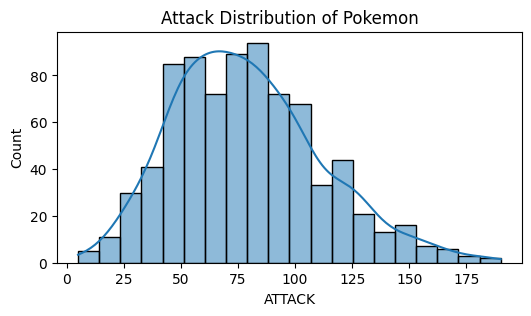

In [26]:
plt.figure(figsize=(6, 3))
plt.title("Attack Distribution of Pokemon")
sns.histplot(x='ATTACK', data=pokemon, kde=True)
plt.show()

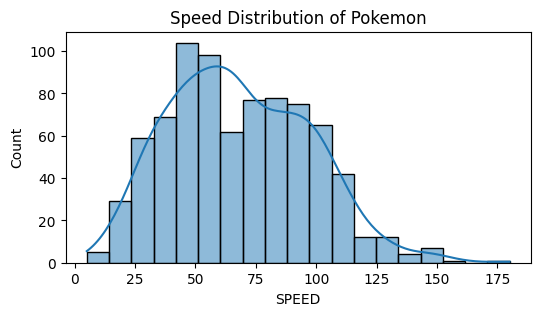

In [27]:
plt.figure(figsize=(6, 3))
plt.title("Speed Distribution of Pokemon")
sns.histplot(x='SPEED', data=pokemon, kde=True)
plt.show()

#### How do the attack and defense stats of dragon and fairy type pokemon compare with each other?

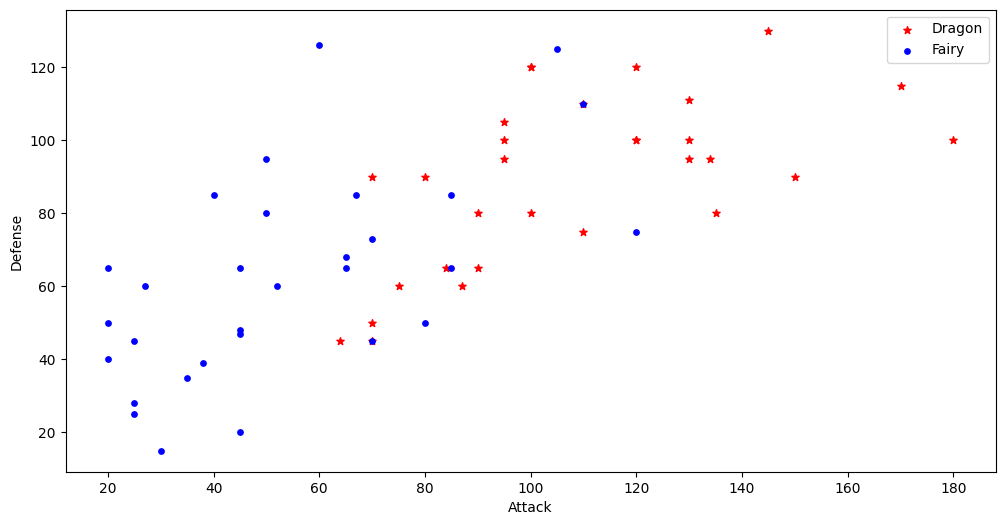

In [28]:
dragon = pokemon[(pokemon['TYPE 1'] == 'Dragon') | (pokemon['TYPE 2'] == 'Dragon')]
fairy = pokemon[(pokemon['TYPE 1'] == 'Fairy') | (pokemon['TYPE 2'] == 'Fairy')]
plt.scatter(dragon.ATTACK.head(30), dragon.DEFENSE.head(30), color='#FF0000', label='Dragon', marker="*", s=30)
plt.scatter(fairy.ATTACK.head(30), fairy.DEFENSE.head(30), color='#0000FF', label='Fairy', s=15)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### What is the percentage distribution of the unique types across all generations?

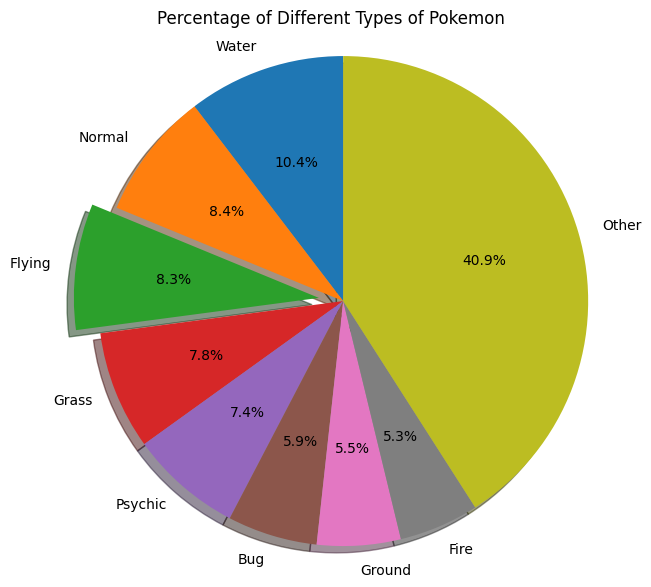

In [29]:
poke_types = pokemon.groupby(['TYPE 1']).size() + pokemon.groupby(['TYPE 2']).size()
sorted_poke_types = poke_types.sort_values(ascending=False)
top_8 = sorted_poke_types.iloc[:8].copy() # Keeping only the 8 most common types
remaining_sum = sorted_poke_types.iloc[8:].sum() # Grouping the remaining types and adding them to create an "Other" section
labels = []
sizes = []
for label, value in top_8.items(): # Separating the data into two lists
    labels.append(label)
    sizes.append(value)
labels.append("Other")
sizes.append(remaining_sum)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

#### Representing the attack stats of all pokemon types

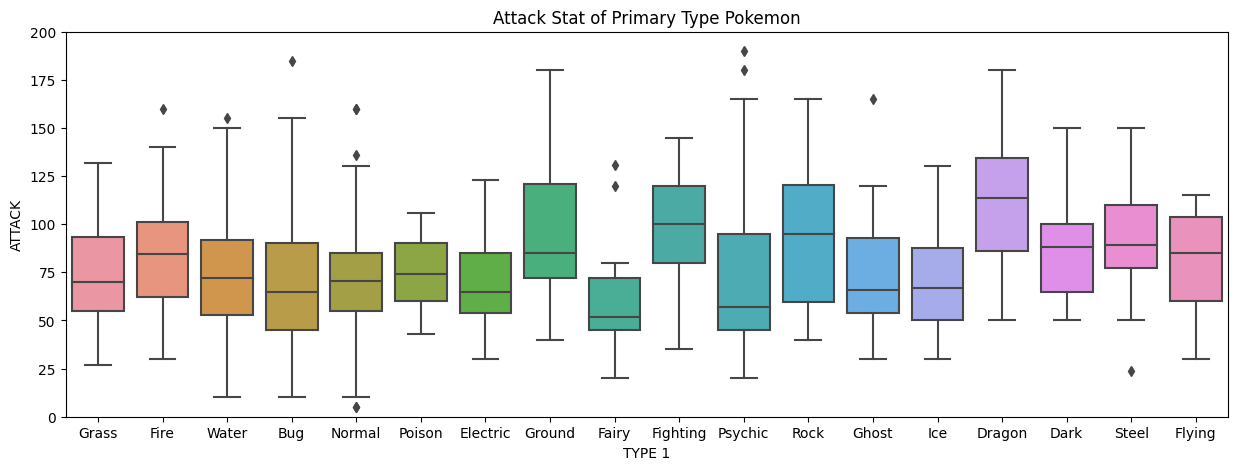

In [30]:
plt.subplots(figsize = (15,5))
plt.title("Attack Stat of Primary Type Pokemon")
sns.boxplot(x = "TYPE 1", y = "ATTACK", data = pokemon)
plt.ylim(0,200)
plt.show()

#### Representing the defense stats of all pokemon types

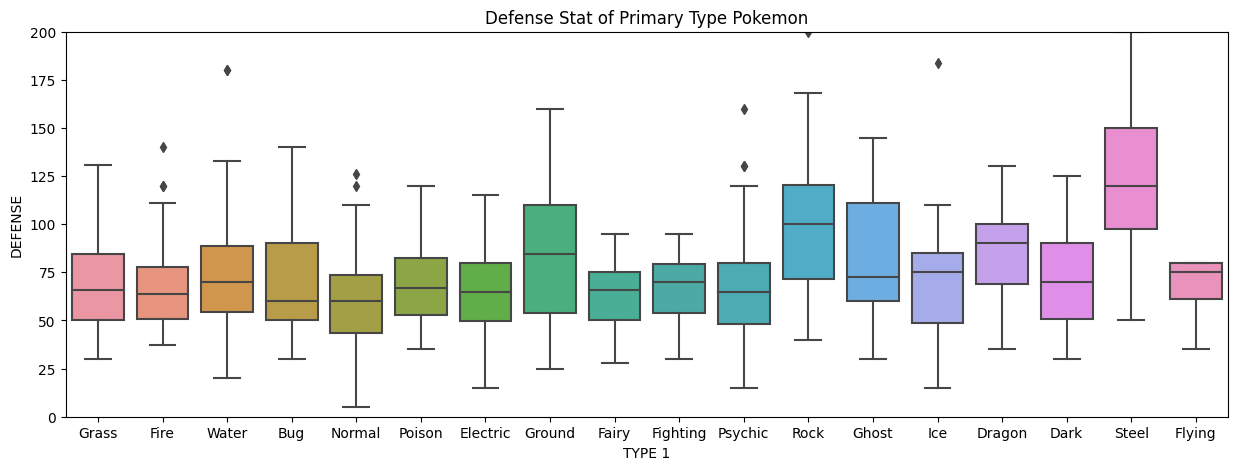

In [31]:
plt.subplots(figsize = (15,5))
plt.title("Defense Stat of Primary Type Pokemon")
sns.boxplot(x = "TYPE 1", y = "DEFENSE", data = pokemon)
plt.ylim(0,200)
plt.show()

#### Which generations of pokemon are the strongest?

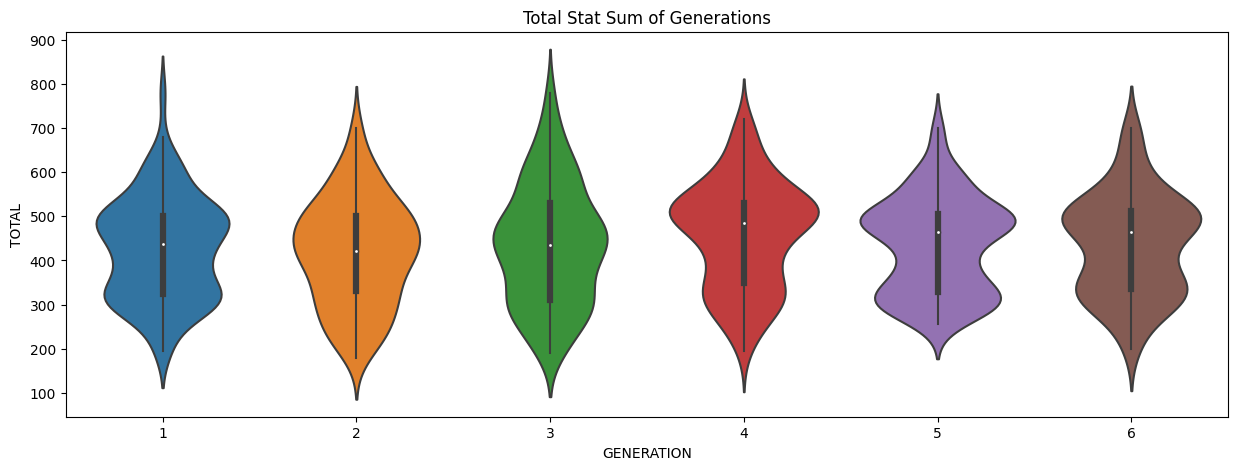

In [32]:
plt.subplots(figsize = (15,5))
plt.title("Total Stat Sum of Generations")
sns.violinplot(x = "GENERATION", y = "TOTAL", data=pokemon)
plt.show()

#### How many new pokemon are introduced every generation?

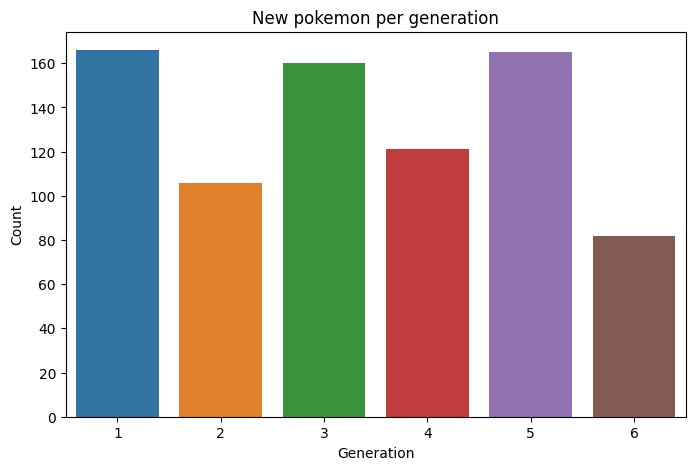

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = pokemon['GENERATION'])
ax.set_title("New pokemon per generation")
ax.set(xlabel='Generation', ylabel='Count')
plt.show()

#### Among the legendary pokemon, which are the most prevalent types?

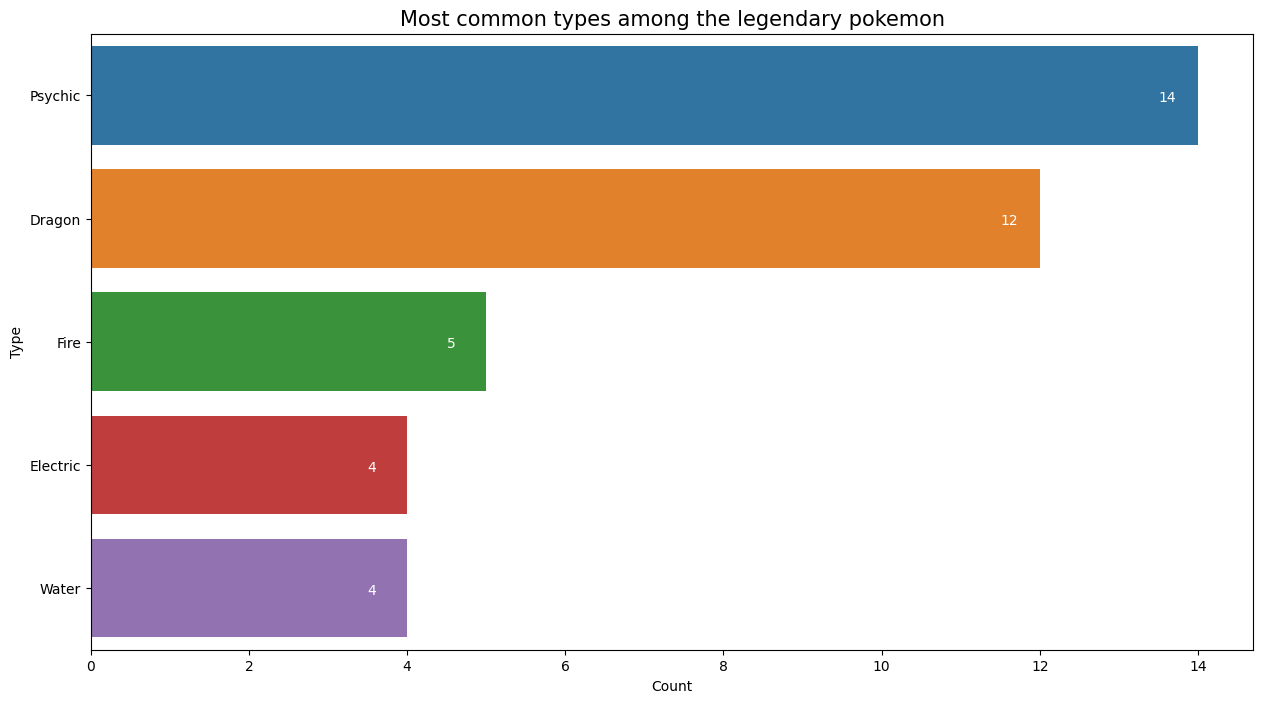

In [54]:
legendary_pokemon = pokemon[pokemon['LEGENDARY'] == True] # Obtaining legendary pokemon
legendary_pokemon_types_top5 = legendary_pokemon["TYPE 1"].value_counts()[:5] # Counting no. of occurrences per unique type 
plt.figure(figsize=(15,8))
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h')
ax.set_title("Most common types among the legendary pokemon", size=15)
ax.set(xlabel="Count", ylabel="Type")
for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(value, xy=(value-0.5, index+0.05), color='white')
plt.show()

#### Which are the most common pairs of dual type pokemon?

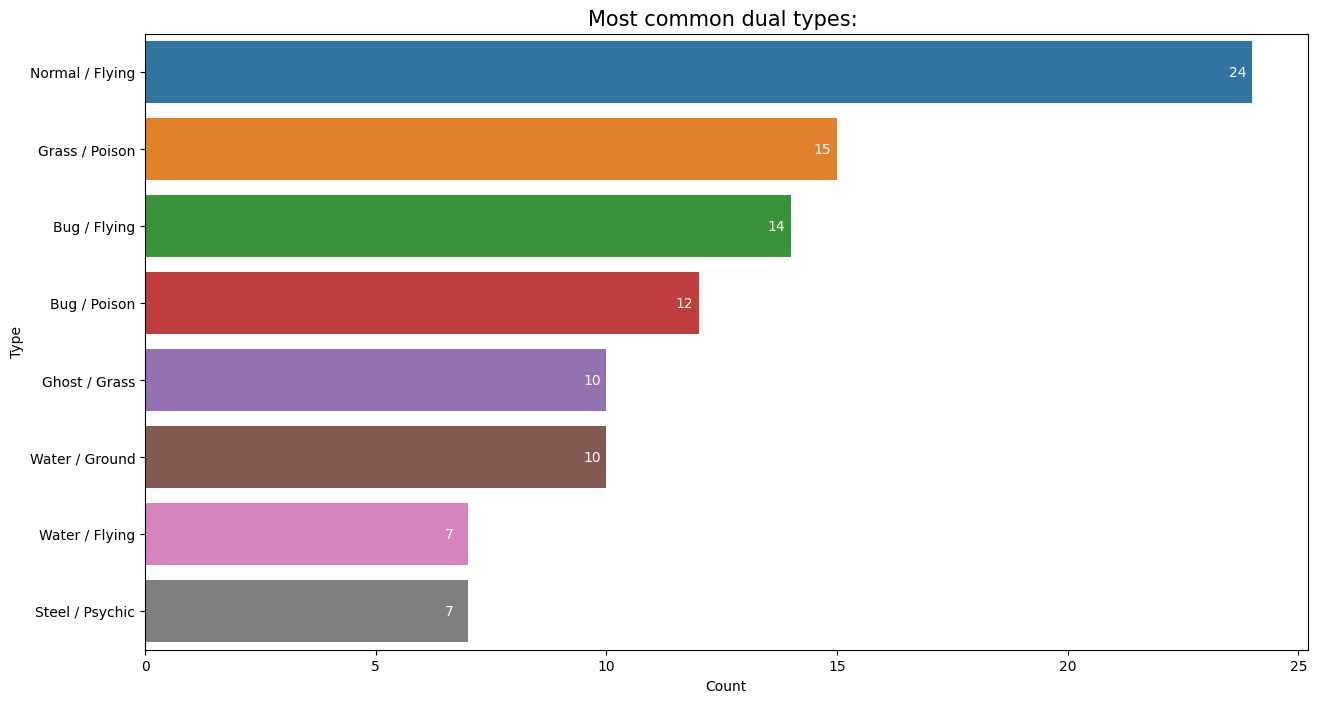

In [35]:
type_combo = pokemon["TYPE 1"] + " / " + pokemon["TYPE 2"] # Creating a column with a combination of type 1 and type 2 values
type_counts = type_combo.value_counts()[:8] # Counting occurrences of unique dual types
plt.figure(figsize=(15,8))
ax = sns.barplot(y=type_counts.index, x=type_counts.values)
ax.set_title("Most common dual types: ", size=15)
ax.set(xlabel="Count", ylabel="Type")
for index, value in enumerate(type_counts):
    plt.annotate(value, xy=(value-0.5, index+0.05), color='white')
plt.show()

#### How do the stats of legendary and non-legendary pokemon compare with each other?

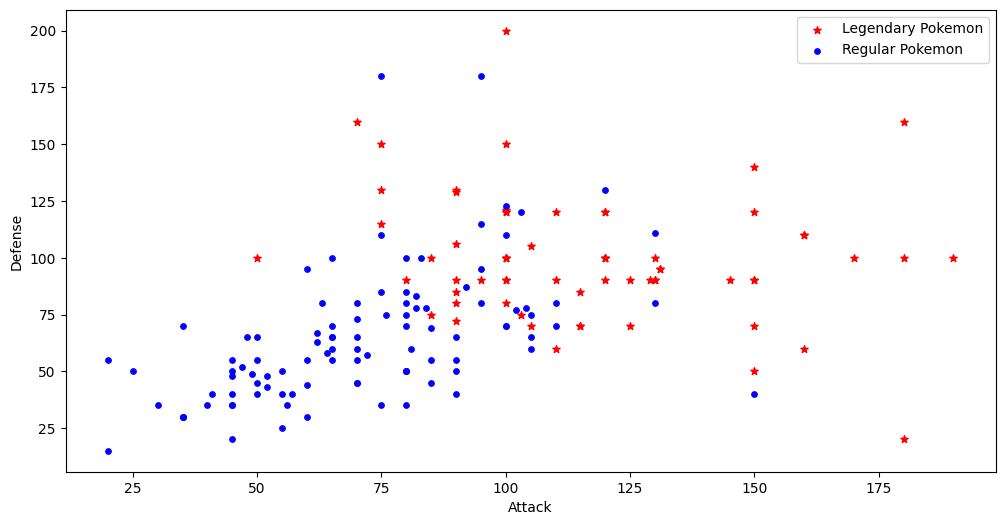

In [36]:
leg = pokemon[pokemon['LEGENDARY'] == True]
not_leg = pokemon[pokemon['LEGENDARY'] == False]
plt.scatter(leg.ATTACK, leg.DEFENSE, color='#FF0000', label='Legendary Pokemon', marker="*", s=30)
plt.scatter(not_leg.ATTACK.head(100), not_leg.DEFENSE.head(100), color='#0000FF', label='Regular Pokemon', s=15)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### Which generation has the strongest starter pokemon according to average stats?

   GENERATION       TOTAL
0           1  313.666667
1           2  313.666667
2           3  310.000000
3           4  313.666667
4           5  308.000000
5           6  311.333333


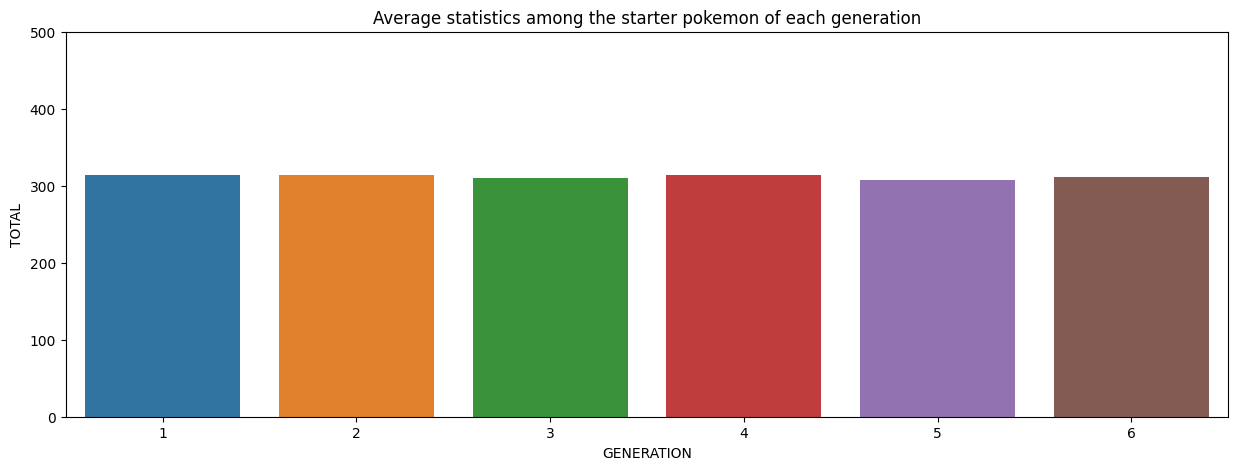

In [71]:
starters_mean = starters.groupby(['GENERATION'])['TOTAL'].mean().reset_index() 
print(starters_mean)
starters_mean
plt.subplots(figsize = (15,5))
plt.title("Average statistics among the starter pokemon of each generation")
sns.barplot(x = "GENERATION", y = "TOTAL", data = starters_mean)
plt.ylim(0,500)
plt.show()

#### Is there any correlation between any of the numerical statistics of the pokemon?

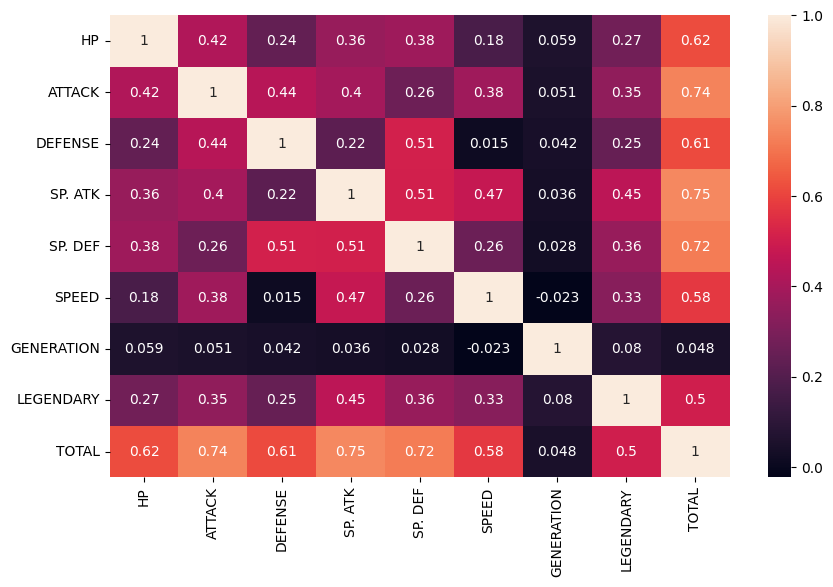

In [38]:
plt.figure(figsize=(10,6)) 
sns.heatmap(pokemon.corr(numeric_only = True),annot=True) 
plt.show()

#### Representing the relation of each stat with each other

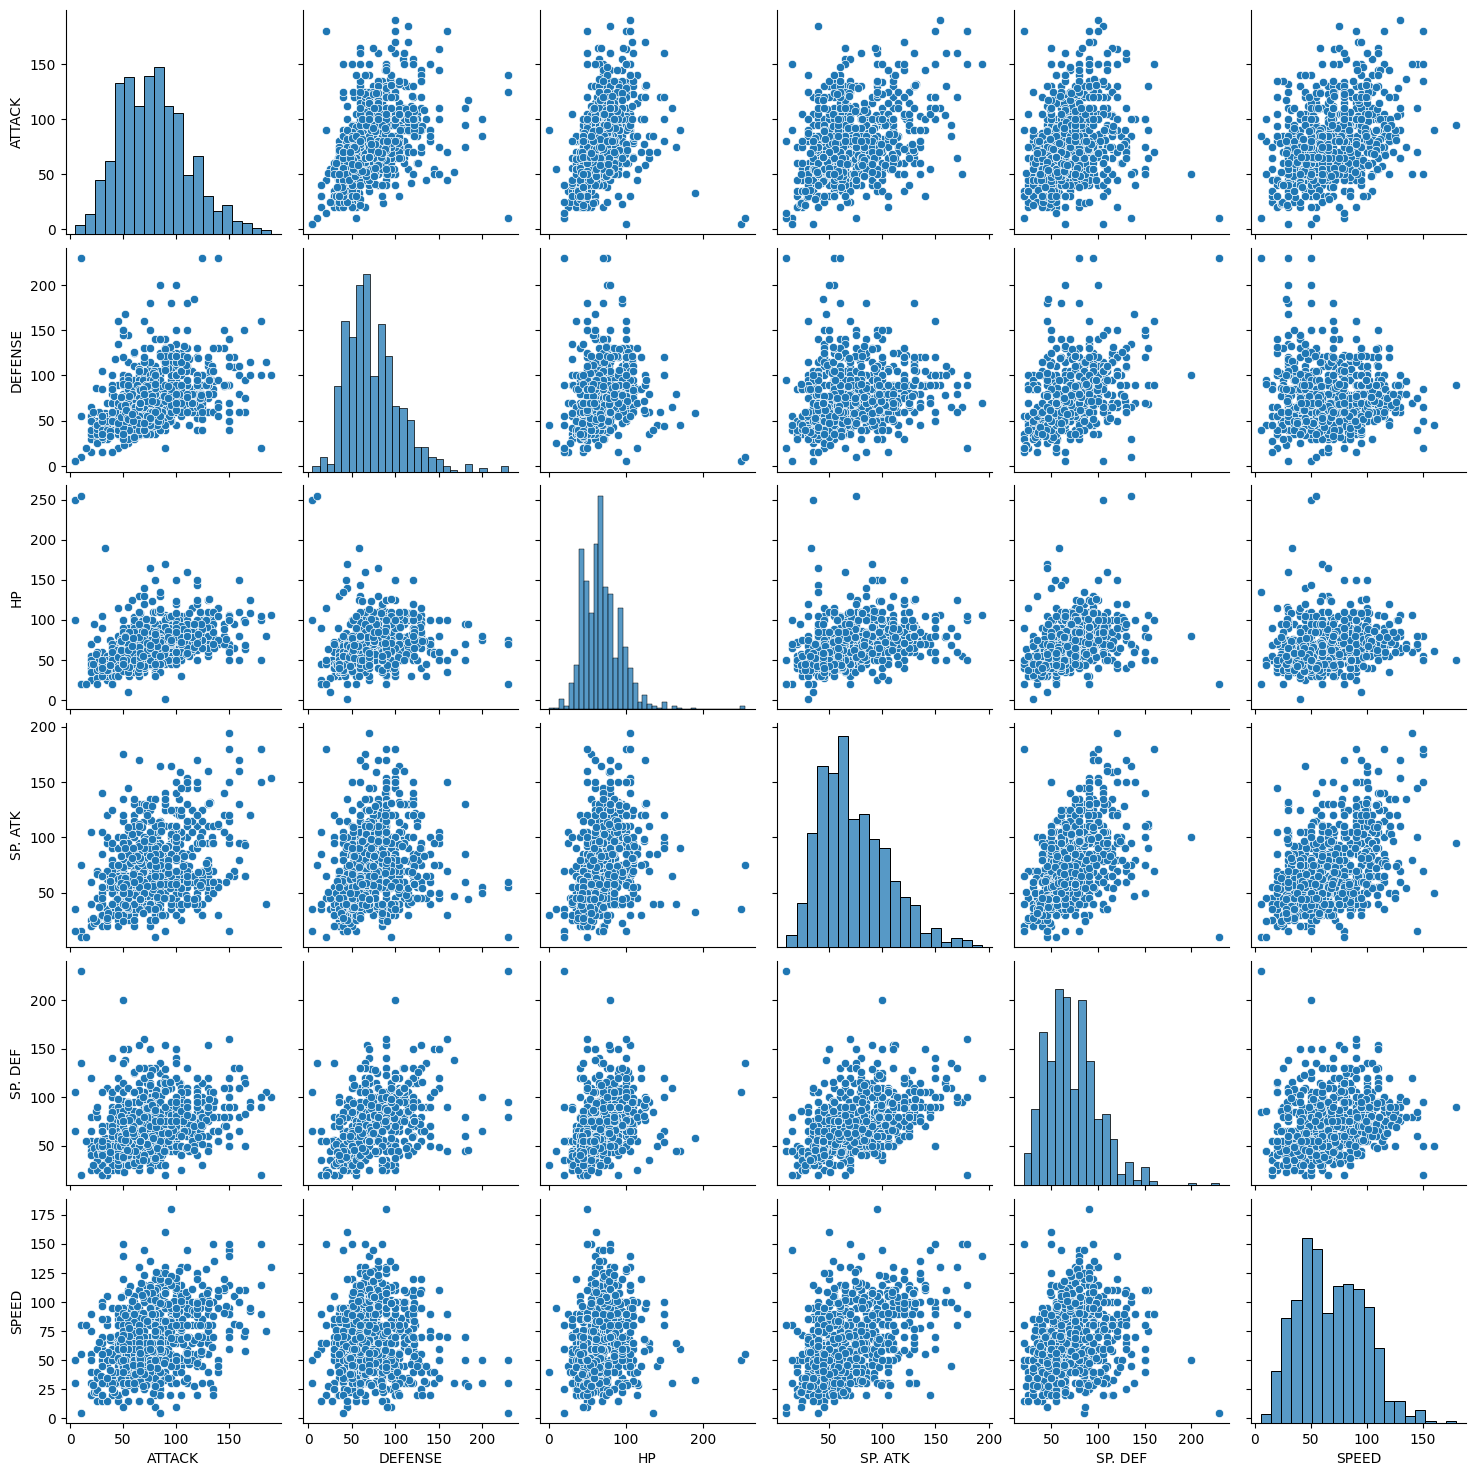

In [39]:
pairs = pokemon[['ATTACK', 'DEFENSE', 'HP', 'SP. ATK', 'SP. DEF', 'SPEED']]
sns.pairplot(pairs)
plt.show()